## Multiclass Classification Model using Neural Network

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data_3_2.csv').to_numpy()

x = data[:, :-1]
y = data[:, -1]

print('x', x.shape)
print('y', y.shape)

x (300, 2)
y (300,)


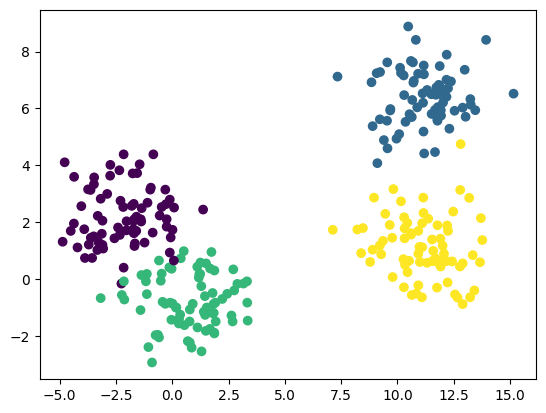

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

### Create a model

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

class MyNeuralNetwork(nn.Module):

  def __init__(self, numb_input):
    super().__init__()
    self.linear1 = nn.Linear(numb_input, 5)
    self.linear2 = nn.Linear(5, 5)
    self.linear3 = nn.Linear(5, 2)
    self.losses = []

  def forward(self, x):
    out = self.linear1(x) # tensor(m, 5)
    out = torch.sigmoid(out) # tensor(m, 5)
    out = self.linear2(out)
    out = torch.sigmoid(out)
    out = self.linear3(out)
    # out = torch.sigmoid(out)
    return out # tensor(m, 2)

  def fit(self, x, y, numb_iter=2000, lr=0.1):
    opt = optim.SGD(self.parameters(), lr=lr)
    cost_func = nn.CrossEntropyLoss()
    for i in range(numb_iter):
      zip = self(x)
      J = cost_func(zip, y)

      if i % 20 == 0:
        print('iter: %d, J: %f' % (i, J.item()))

      J.backward()
      opt.step() # update gradient
      opt.zero_grad()  # reset gradient
      self.losses.append(J.item())

  def evaluate(self, x, y):
    zip = self(x)
    # y = y.long()
    predict = torch.argmax(zip, dim=1)
    accuracy = (predict == y).sum().item() / len(y)
    return accuracy


In [5]:
#feature scaling
def feature_scaling(x):
  mu = np.mean(x, axis=0) #np(n)
  x = (x-mu)/(np.max(x, axis=0)-np.min(x, axis=0))
  return x

### Data Preparation
90% for training (seen data), 10% for testing (unseen data).

length of x:  300
train_data_index:  270


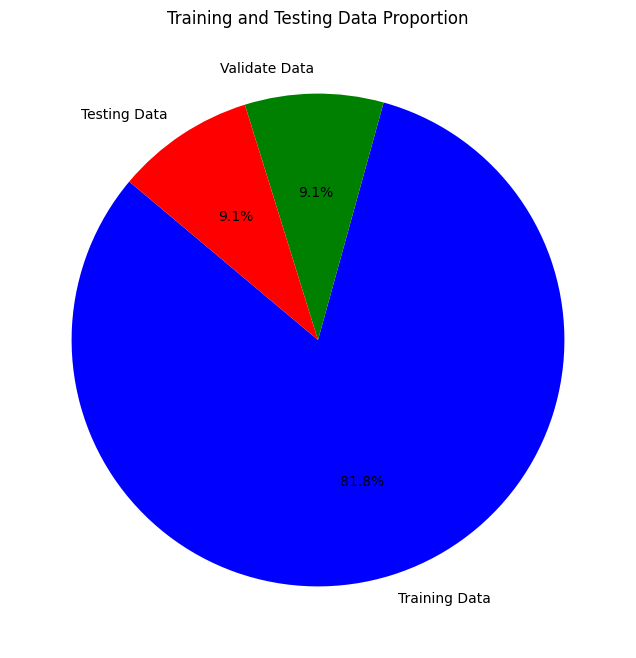

In [23]:
print('length of x: ', len(x))
train_data_index = int(len(x) * 0.9) # 90% of the data is used for training
# train_data_index = len(x) # 100% of the data is used for training
print('train_data_index: ', train_data_index)
tx = x[:train_data_index]
ty = y[:train_data_index]

train_x = torch.tensor(tx.copy(), dtype=torch.float32)
train_scaled_x = torch.tensor(feature_scaling(tx.copy().reshape(-1, 2)), dtype=torch.float32)
train_y = torch.tensor(ty.copy(), dtype=torch.long)

validate_data_index = int(len(x) * 0.8) 
vx = x[validate_data_index:train_data_index] # 10% of the data is used for validation
vy = y[validate_data_index:train_data_index]

validate_x = torch.tensor(vx.copy(), dtype=torch.float32)
validate_y = torch.tensor(vy.copy(), dtype=torch.long)

tt_x = x[train_data_index:]
tt_y = y[train_data_index:]

test_x = torch.tensor(tt_x.copy(), dtype=torch.float32)
test_y = torch.tensor(tt_y.copy(), dtype=torch.long)

# Plotting the data
dd = [len(tx), len(vx), len(tt_x)]
labels = ['Training Data', 'Validate Data', 'Testing Data']
colors = ['blue', 'green', 'red']
# Plotting the pie chart
def plot_pie_chart(data, labels, colors):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Training and Testing Data Proportion')
    plt.show()

plot_pie_chart(dd, labels, colors)

### Training Model Without Feature Scaling

In [24]:
models = [MyNeuralNetwork(2), MyNeuralNetwork(2), MyNeuralNetwork(2), MyNeuralNetwork(2)]

for i, model in enumerate(models):
  new_y = ty.copy()
  id = new_y == i
  id_not = new_y != i
  new_y[id] = 1
  new_y[id_not] = 0
  local_y = torch.tensor(new_y, dtype=torch.long)
  model.fit(train_x, local_y)

iter: 0, J: 0.737909
iter: 20, J: 0.548303
iter: 40, J: 0.536375
iter: 60, J: 0.527433
iter: 80, J: 0.517091
iter: 100, J: 0.504683
iter: 120, J: 0.489680
iter: 140, J: 0.471615
iter: 160, J: 0.450184
iter: 180, J: 0.425387
iter: 200, J: 0.397660
iter: 220, J: 0.367915
iter: 240, J: 0.337414
iter: 260, J: 0.307526
iter: 280, J: 0.279444
iter: 300, J: 0.253991
iter: 320, J: 0.231563
iter: 340, J: 0.212193
iter: 360, J: 0.195669
iter: 380, J: 0.181653
iter: 400, J: 0.169767
iter: 420, J: 0.159648
iter: 440, J: 0.150977
iter: 460, J: 0.143483
iter: 480, J: 0.136944
iter: 500, J: 0.131181
iter: 520, J: 0.126053
iter: 540, J: 0.121448
iter: 560, J: 0.117276
iter: 580, J: 0.113466
iter: 600, J: 0.109962
iter: 620, J: 0.106717
iter: 640, J: 0.103693
iter: 660, J: 0.100860
iter: 680, J: 0.098192
iter: 700, J: 0.095668
iter: 720, J: 0.093273
iter: 740, J: 0.090993
iter: 760, J: 0.088819
iter: 780, J: 0.086744
iter: 800, J: 0.084762
iter: 820, J: 0.082873
iter: 840, J: 0.081072
iter: 860, J: 0.0

### Plot the losses

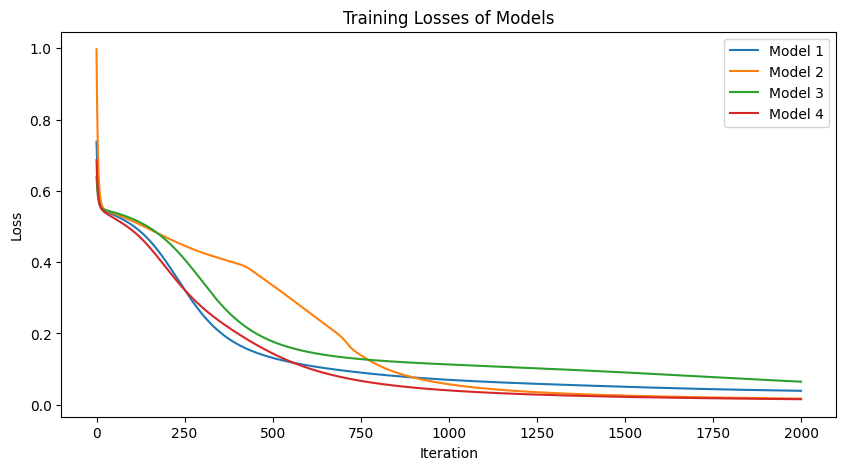

In [25]:
# Plotting the losses
def plot_losses(models):
    plt.figure(figsize=(10, 5))
    for i, model in enumerate(models):
        plt.plot(model.losses, label=f'Model {i+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Losses of Models')
    plt.legend()
    plt.show()

plot_losses(models)

### Evaluating the Models Without Feature Scaling

In [32]:
for i, model in enumerate(models):
  accuracy = model.evaluate(validate_x, validate_y)
  print('Model %d, accuracy rate: %.4f' % (i+1, accuracy))

Model 1, accuracy rate: 0.0000
Model 2, accuracy rate: 0.4000
Model 3, accuracy rate: 0.2000
Model 4, accuracy rate: 0.2000


### Train the Models with Feature Scaling

In [35]:
scaled_models = [MyNeuralNetwork(2), MyNeuralNetwork(2), MyNeuralNetwork(2), MyNeuralNetwork(2)]

for i, model in enumerate(scaled_models):
  new_y = ty.copy()
  id = new_y == i
  id_not = new_y != i
  new_y[id] = 1
  new_y[id_not] = 0
  local_y = torch.tensor(new_y, dtype=torch.long)
  model.fit(train_scaled_x, local_y, numb_iter=5000)

iter: 0, J: 0.640294
iter: 20, J: 0.565106
iter: 40, J: 0.564125
iter: 60, J: 0.564077
iter: 80, J: 0.564046
iter: 100, J: 0.564015
iter: 120, J: 0.563983
iter: 140, J: 0.563951
iter: 160, J: 0.563918
iter: 180, J: 0.563885
iter: 200, J: 0.563851
iter: 220, J: 0.563817
iter: 240, J: 0.563782
iter: 260, J: 0.563747
iter: 280, J: 0.563711
iter: 300, J: 0.563674
iter: 320, J: 0.563637
iter: 340, J: 0.563598
iter: 360, J: 0.563559
iter: 380, J: 0.563519
iter: 400, J: 0.563479
iter: 420, J: 0.563437
iter: 440, J: 0.563394
iter: 460, J: 0.563351
iter: 480, J: 0.563306
iter: 500, J: 0.563260
iter: 520, J: 0.563213
iter: 540, J: 0.563165
iter: 560, J: 0.563115
iter: 580, J: 0.563064
iter: 600, J: 0.563012
iter: 620, J: 0.562958
iter: 640, J: 0.562903
iter: 660, J: 0.562846
iter: 680, J: 0.562787
iter: 700, J: 0.562727
iter: 720, J: 0.562664
iter: 740, J: 0.562600
iter: 760, J: 0.562534
iter: 780, J: 0.562465
iter: 800, J: 0.562394
iter: 820, J: 0.562321
iter: 840, J: 0.562245
iter: 860, J: 0.5

### Plot the losses

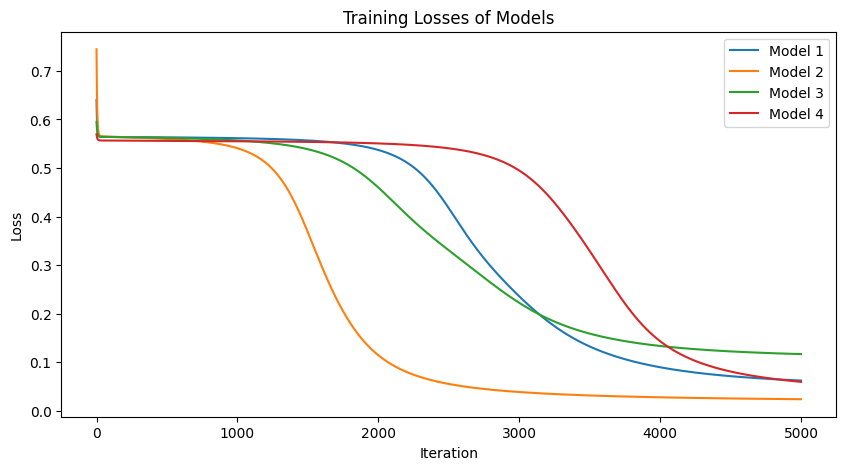

In [36]:
plot_losses(scaled_models)

### Evaluate the Scaled Models

In [1]:
for i, model in enumerate(scaled_models):
  accuracy = model.evaluate(validate_x, validate_y)
  print('Model %d, accuracy rate: %.4f' % (i+1, accuracy))

NameError: name 'scaled_models' is not defined